In [1]:
import torch 
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import os
from ResNet import ResNet
from backup import ImageTransform

In [2]:
dev = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [25]:
class SingleImage(object):

    def __init__(self):
        self.models_list = [] 


    def add_model(self, model_path):
        model = ResNet()
        model.load_state_dict(torch.load(model_path, map_location='cpu'))
        self.models_list.append(model)


    def add_multiple(self, models_path):
        names_list = os.listdir(models_path)
        paths_list = [os.path.join(models_path, x) for x in names_list]

        for i in paths_list : 
            if i.endswith('.pt'):
                model = ResNet()
                model.load_state_dict(torch.load(i, map_location='cpu'))
                self.models_list.append(model)

    def add_all(self):
        path = '/Users/gursi/Desktop/ML/Neural_style_transfer/models_outputs'
        items = os.listdir(path)
        items.remove('original.png')
        items.remove('.DS_Store')
        for item in items : 
            show.add_multiple(os.path.join(path,item))


    def deprocess(self,img):
        img = img.clamp(0,255).detach().numpy()
        img = img.transpose(1,2,0).astype('uint8')
        img = Image.fromarray(img)
        return img


    def convert(self, input_img_path, size_threshold=600, individual=False): 
        import math 

        input_img = Image.open(input_img_path).convert('RGB')
        h, w = input_img.size 

        while h > size_threshold or w > size_threshold : 
            h = int(h // 1.2)
            w = int(w // 1.2)

        input_img = input_img.resize((h,w)) 
        num_images = len(self.models_list)

        ncols = 4
        nrows = math.ceil(num_images/ncols)

        if not individual : 
            fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows + 5 * 5,10))
            ax = ax.flatten()
            ax = ax[:num_images + 1]
        else : 
            ax = torch.zeros((len(self.models_list)))
        
        model_input = transforms.ToTensor()(input_img).unsqueeze(0)
        if not individual : 
            ax[0].imshow(input_img)
            ax[0].axis(False)
        else : 
            plt.figure(figsize = (12,9))
            plt.imshow(input_img)

        for model, axes in zip(self.models_list,ax[1:]) : 
            out = model.forward(model_input)
            img = self.deprocess(out[0])
            if not individual : 
                axes.axis(False)
                axes.imshow(img)
            else : 
                plt.figure(figsize=(12,9))
                plt.imshow(img)

In [27]:
show = SingleImage()
show.add_model('/users/gursi/downloads/model.pt')

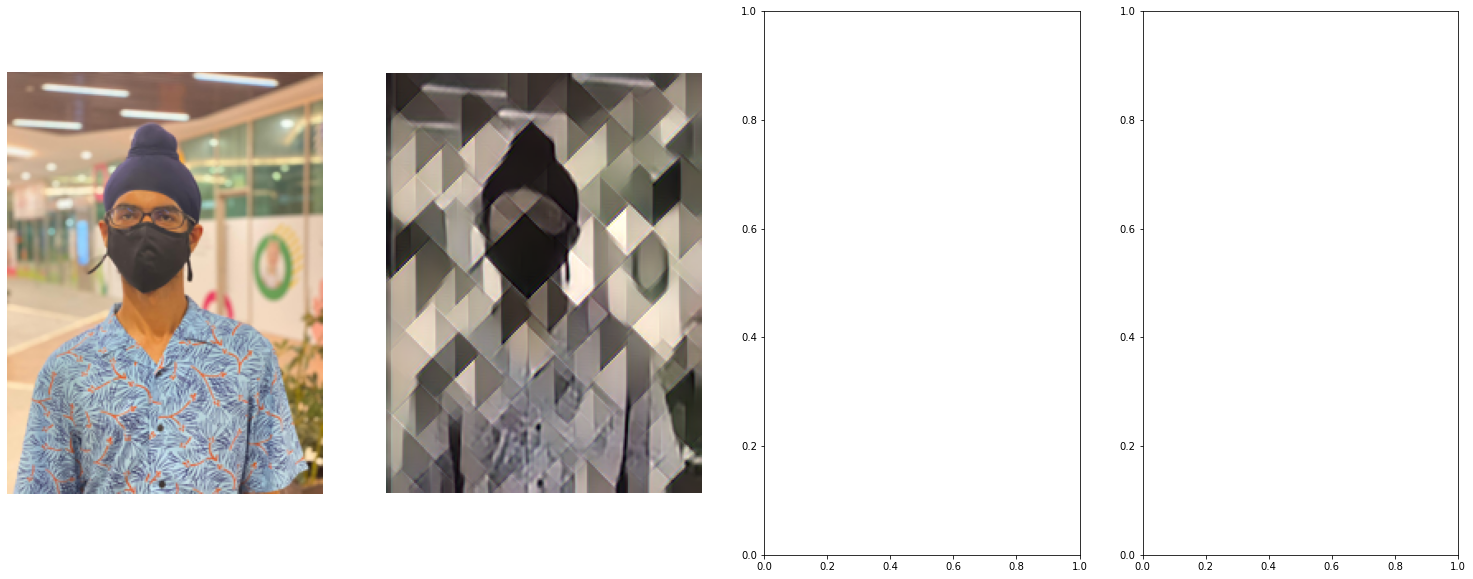

In [30]:
show.convert('/users/gursi/desktop/img2.JPG', size_threshold=300, individual=False)